In [31]:
# Cargue las bibliotecas 
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.preprocessing import LabelEncoder

In [32]:
#cargamos el archivo con el cual trabajaremos
dataset = pd.read_csv('diabetes_data_upload.csv')

In [33]:
dataset.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [35]:
dataset.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [36]:
dataset.columns = ['Age', 'Gender','polyuria', 'Polydipsia', 'sudden', 'weakness', 'Polyphagia', 'Genital', 'visual', 
                 'Itching', 'Irritability', 'delayed', 'partial', 'muscle', 'Alopecia', 'Obesity', 'clase']
dataset.columns

Index(['Age', 'Gender', 'polyuria', 'Polydipsia', 'sudden', 'weakness',
       'Polyphagia', 'Genital', 'visual', 'Itching', 'Irritability', 'delayed',
       'partial', 'muscle', 'Alopecia', 'Obesity', 'clase'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
dataset.Gender = le.fit_transform(dataset.Gender)
dataset.polyuria = le.fit_transform(dataset.polyuria)
dataset.Polydipsia = le.fit_transform(dataset.Polydipsia)
dataset.sudden = le.fit_transform(dataset.sudden)
dataset.weakness = le.fit_transform(dataset.weakness)
dataset.Polyphagia = le.fit_transform(dataset.Polyphagia)
dataset.Genital = le.fit_transform(dataset.Genital)
dataset.visual = le.fit_transform(dataset.visual)
dataset.Itching = le.fit_transform(dataset.Itching)
dataset.Irritability = le.fit_transform(dataset.Irritability)
dataset.delayed = le.fit_transform(dataset.delayed)
dataset.partial = le.fit_transform(dataset.partial)
dataset.muscle = le.fit_transform(dataset.muscle)
dataset.Alopecia = le.fit_transform(dataset.Alopecia)
dataset.Obesity = le.fit_transform(dataset.Obesity)
dataset.clase = le.fit_transform(dataset.clase)

In [40]:
dataset

,Age,Gender,polyuria,Polydipsia,sudden,weakness,Polyphagia,Genital,visual,Itching,Irritability,delayed,partial,muscle,Alopecia,Obesity,clase
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [41]:
dataset.describe()

,Age,Gender,polyuria,Polydipsia,sudden,weakness,Polyphagia,Genital,visual,Itching,Irritability,delayed,partial,muscle,Alopecia,Obesity,clase
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           520 non-null    int64
 1   Gender        520 non-null    int32
 2   polyuria      520 non-null    int32
 3   Polydipsia    520 non-null    int32
 4   sudden        520 non-null    int32
 5   weakness      520 non-null    int32
 6   Polyphagia    520 non-null    int32
 7   Genital       520 non-null    int32
 8   visual        520 non-null    int32
 9   Itching       520 non-null    int32
 10  Irritability  520 non-null    int32
 11  delayed       520 non-null    int32
 12  partial       520 non-null    int32
 13  muscle        520 non-null    int32
 14  Alopecia      520 non-null    int32
 15  Obesity       520 non-null    int32
 16  clase         520 non-null    int32
dtypes: int32(16), int64(1)
memory usage: 36.7 KB


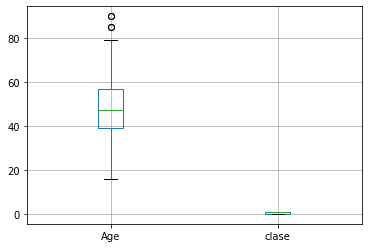

In [44]:
#forma visual las variables utilizando el tipo de gráfico boxplot
dataset.boxplot(column=['Age', 'clase'])
plt.show()

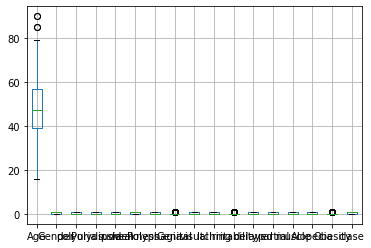

In [12]:
dataset.boxplot()

In [13]:
x = dataset.iloc[:,0:16].values
y = dataset.iloc[:, 16].values

In [14]:
#conjunto de datos en 75% (Entrenamiento) y 25% (Test) utilizando la función train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [15]:
#entrenamiento de el arbol de decicion
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [18]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [19]:
#matriz de confucion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  5],
       [ 4, 70]], dtype=int64)

In [20]:
#accuracy
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred, average = 'weighted'))
print("ROC: ", metrics.roc_auc_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred, average = 'weighted'))

Accuracy:  0.9307692307692308
F1 Score:  0.9306896984749333
ROC:  0.9283301158301158
Recall:  0.9307692307692308


In [21]:
from sklearn import tree
tree.export_graphviz(classifier, out_file = 'tree_social.dot')

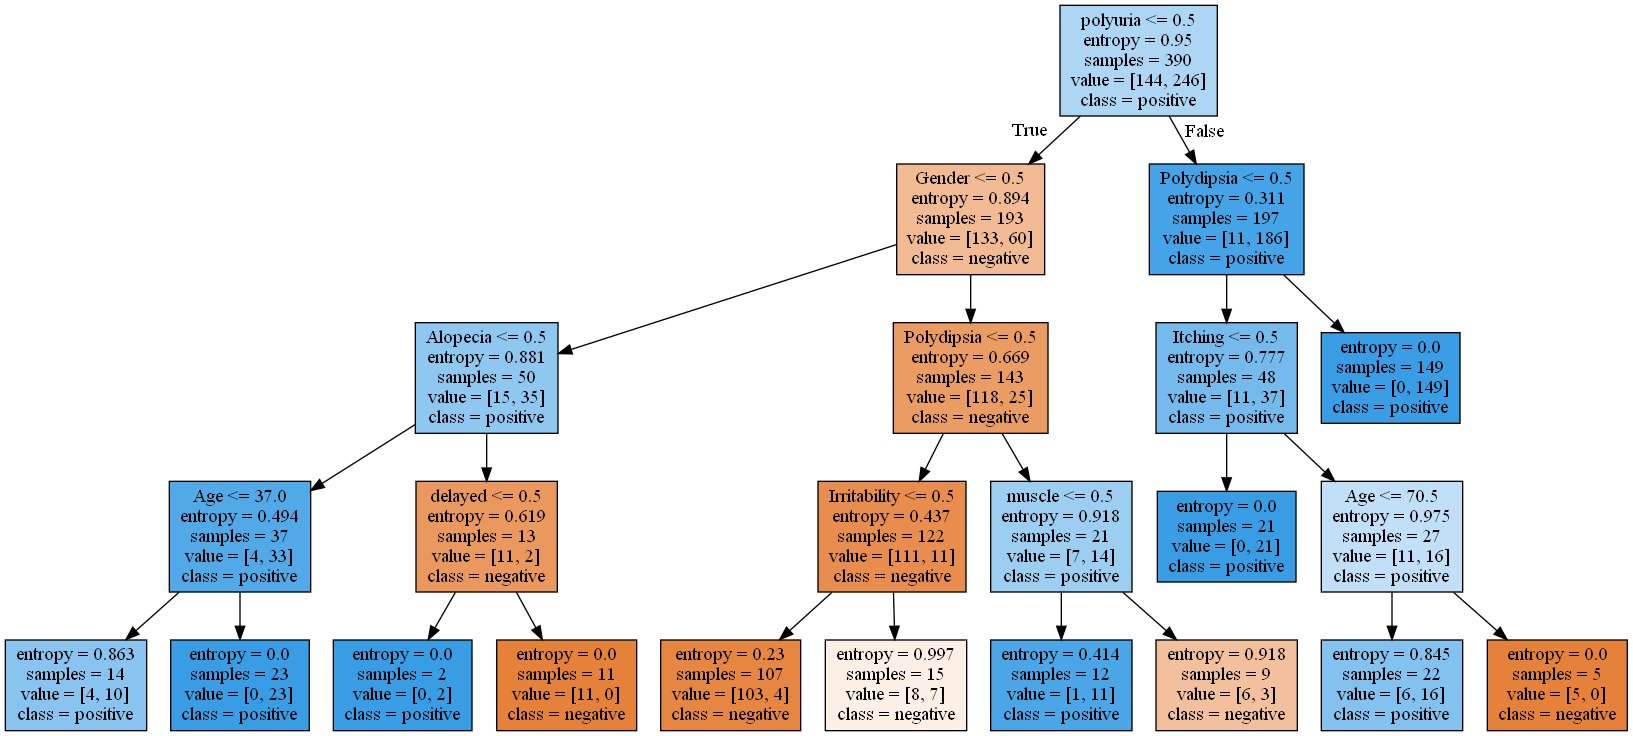

In [22]:
dot_data = tree.export_graphviz(classifier, 
                                out_file = None,
                                class_names = ['negative', 'positive'],
                                feature_names = list(dataset.drop(['clase'], axis=1)),
                                filled= True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [64]:
graph.write_png("1ro.png")

True